## Function for all scenarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def simulate_with(n_samples, 
                  vx_bias, 
                  vy_bias, 
                  delta_t,
                  box_size_mm,
                  consider_grouped_position, 
                  consider_different_behaviour, 
                  consider_instrumentation_accuracy,plot):
    
    k_percent_grouped = .1
    k_percent_noise   = .1
    k_min_acc         = 10 # mm
    
    check_borders_l  = lambda i: 0 if i<0 else i
    check_borders_h  = lambda i: box_size_mm if i>box_size_mm else i
    
    
    
    if not(consider_instrumentation_accuracy):###################################################################################################
        if not(consider_grouped_position):
            x_orig  = box_size_mm*np.random.random(n_samples)
            y_orig  = box_size_mm*np.random.random(n_samples)
        
        if consider_grouped_position:
            x_orig1 = .1*box_size_mm*np.random.random(int(n_samples*k_percent_grouped))
            y_orig1 = .1*box_size_mm*np.random.random(int(n_samples*k_percent_grouped))
            x_orig2 = box_size_mm*np.random.random(int(n_samples*(1-k_percent_grouped)))
            y_orig2 = box_size_mm*np.random.random(int(n_samples*(1-k_percent_grouped)))
            x_orig  = np.concatenate((x_orig1, x_orig2), axis=None) 
            y_orig  = np.concatenate((y_orig1, y_orig2), axis=None)
    
        x = x_orig
        y = y_orig
    
        if not(consider_different_behaviour):
            x_n = x + vx_bias*delta_t
            y_n = y + vy_bias*delta_t
        
        if consider_different_behaviour:
            n = int(len(x)*k_percent_noise)
            x2 = x[:n];x1 = x[-(len(x)-n):]
            y2 = y[:n];y1 = y[-(len(y)-n):]
            x_n1 = x1 + vx_bias*delta_t 
            x_n2 = x2 + vx_bias*delta_t + vx_bias*np.random.random(len(x2))*delta_t
            y_n1 = y1 + vy_bias*delta_t 
            y_n2 = y2 + vy_bias*delta_t + vy_bias*np.random.random(len(y2))*delta_t
            x_n = [*x_n1 , *x_n2]
            y_n = [*y_n1 , *y_n2]
            
        x_n = [check_borders_l(check_borders_h(i)) for i in x_n]
        y_n = [check_borders_l(check_borders_h(i)) for i in y_n]
    
    
    
    else:###################################################################################################
        
        if not(consider_grouped_position):
            x_orig  = box_size_mm*np.random.random(n_samples)
            y_orig  = box_size_mm*np.random.random(n_samples)
    
        if consider_grouped_position:
            x_orig1 = .1*box_size_mm*np.random.random(int(n_samples*k_percent_grouped))
            y_orig1 = .1*box_size_mm*np.random.random(int(n_samples*k_percent_grouped))
            x_orig2 = box_size_mm*np.random.random(int(n_samples*(1-k_percent_grouped)))
            y_orig2 = box_size_mm*np.random.random(int(n_samples*(1-k_percent_grouped)))
            x_orig  = np.concatenate((x_orig1, x_orig2), axis=None)
            y_orig  = np.concatenate((y_orig1, y_orig2), axis=None)

        x = x_orig
        y = y_orig
        
        if not(consider_different_behaviour):
            x_n = x + vx_bias*delta_t
            y_n = y + vy_bias*delta_t
            x_n = np.array(list(map(int, x_n *k_min_acc)))/k_min_acc
            y_n = np.array(list(map(int, y_n *k_min_acc)))/k_min_acc
            
        if consider_different_behaviour:
            n = int(len(x)*k_percent_noise)
            x2 = x[:n];x1 = x[-(len(x)-n):]
            y2 = y[:n];y1 = y[-(len(y)-n):]
            x_n1 = x1 + vx_bias*delta_t 
            x_n2 = x2 + vx_bias*delta_t + vx_bias*np.random.random(len(x2))*delta_t
            y_n1 = y1 + vy_bias*delta_t 
            y_n2 = y2 + vy_bias*delta_t + vy_bias*np.random.random(len(y2))*delta_t
            x_n = [*x_n1 , *x_n2]
            y_n = [*y_n1 , *y_n2]
            x_n = np.array(list(map(int, x_n *k_min_acc)))
            y_n = np.array(list(map(int, y_n *k_min_acc)))
        
        x = np.array(list(map(int, x*k_min_acc)))/k_min_acc
        y = np.array(list(map(int, y*k_min_acc)))/k_min_acc
        x_n = np.array(list(map(int, x_n *k_min_acc)))/k_min_acc
        y_n = np.array(list(map(int, y_n *k_min_acc)))/k_min_acc
        x_n = [check_borders_l(check_borders_h(i)) for i in x_n]
        y_n = [check_borders_l(check_borders_h(i)) for i in y_n]
    
    if plot:
        fig = plt.figure(figsize=(5,5))
        plt.scatter(x  , y  ,s=10)
        plt.scatter(x_n, y_n,s=10)
        plt.title(f"__{n_samples}_g_{consider_grouped_position}_n_{consider_different_behaviour}_i_{consider_instrumentation_accuracy}__")
        plt.xticks([])
        plt.yticks([])
        plt.show()
        fig.savefig(f"{n_samples}_g_{consider_grouped_position}_n_{consider_different_behaviour}_i_{consider_instrumentation_accuracy}.eps", format='eps', dpi=3000)
        
#         fig = plt.figure(figsize=(20,20))
#         plt.scatter(x  , y  ,s=10)
#         plt.scatter(x_n, y_n,s=10)
#         plt.xticks([])
#         plt.yticks([])
#         fig.savefig(f"{n_samples}_g_{consider_grouped_position}_n_{consider_different_behaviour}_i_{consider_instrumentation_accuracy}_no_frame.eps", format='eps', dpi=3000)
   
    x_n1,y_n1 = [],[]
    random.shuffle(y)
    for i in range(n_samples):
        x_min = []
        for j in range(x.shape[0]):
            x_min.append((x_n[j] - x[0])**2 + (y_n[j] - y[0])**2)
        x = np.delete(x,0)
        y = np.delete(y,0)
        x_n1.append(x_n[np.argmin(x_min)])
        y_n1.append(y_n[np.argmin(x_min)])
        x_n = np.delete(x_n,np.argmin(x_min))   
        y_n = np.delete(y_n,np.argmin(x_min))

    x_dist = np.mean(x_n1-x_orig)
    y_dist = np.mean(y_n1-y_orig)
    
    if plot:
        print(f"vx_bias = {vx_bias}, vx_simulated = {x_dist/delta_t}")
        print(f"vy_bias = {vy_bias}, vy_simulated = {y_dist/delta_t}")
    return x_dist/delta_t, y_dist/delta_t

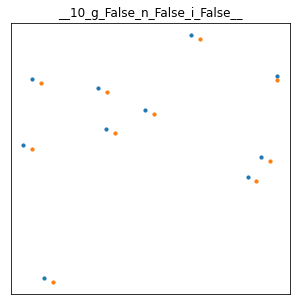

vx_bias = 16, vx_simulated = 14.473947910212848
vy_bias = -8, vy_simulated = -8.0


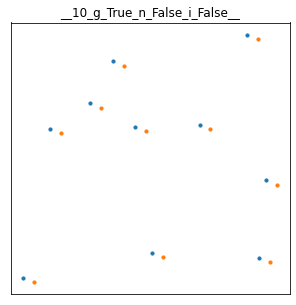

vx_bias = 16, vx_simulated = 16.0
vy_bias = -8, vy_simulated = -8.0


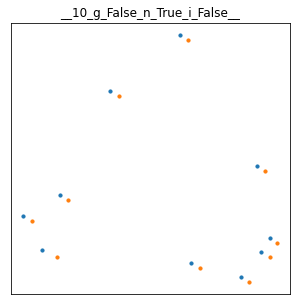

vx_bias = 16, vx_simulated = 16.83435340832134
vy_bias = -8, vy_simulated = -8.301455508402384


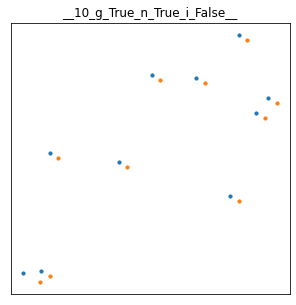

vx_bias = 16, vx_simulated = 17.47258734994304
vy_bias = -8, vy_simulated = -8.59525487367672


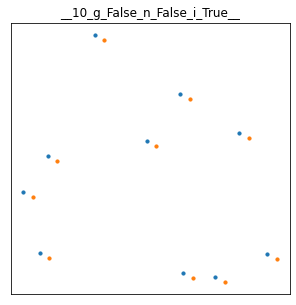

vx_bias = 16, vx_simulated = 15.94614514391752
vy_bias = -8, vy_simulated = -8.04567213343158


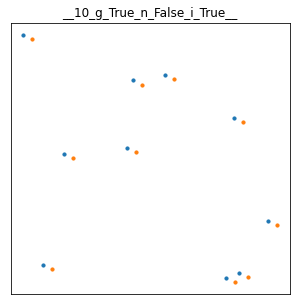

vx_bias = 16, vx_simulated = 15.971900836052901
vy_bias = -8, vy_simulated = -8.035395346456529


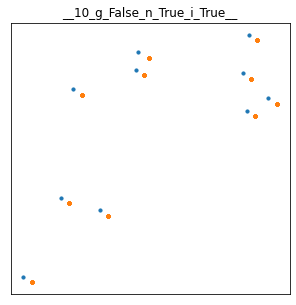

vx_bias = 16, vx_simulated = 15.858448744009431
vy_bias = -8, vy_simulated = -8.157854462391663


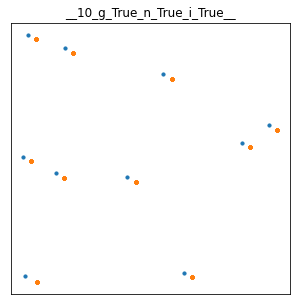

vx_bias = 16, vx_simulated = 16.286473906526204
vy_bias = -8, vy_simulated = -8.86271923962055


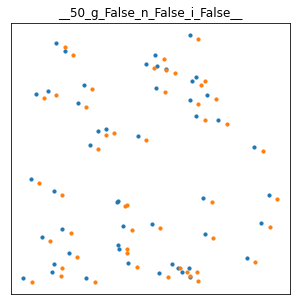

vx_bias = 16, vx_simulated = 16.000000000000004
vy_bias = -8, vy_simulated = -8.0


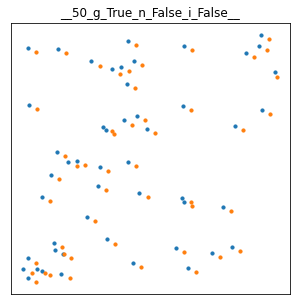

vx_bias = 16, vx_simulated = 15.759958209927822
vy_bias = -8, vy_simulated = -8.000000000000002


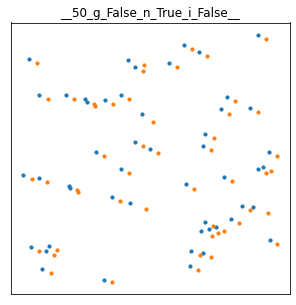

vx_bias = 16, vx_simulated = 17.0421523733604
vy_bias = -8, vy_simulated = -8.273610921102538


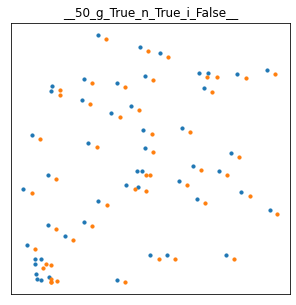

vx_bias = 16, vx_simulated = 16.684692539484374
vy_bias = -8, vy_simulated = -7.921226472400474


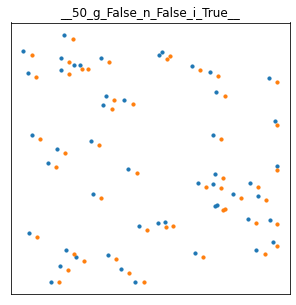

vx_bias = 16, vx_simulated = 15.171370412890678
vy_bias = -8, vy_simulated = -7.73778540793154


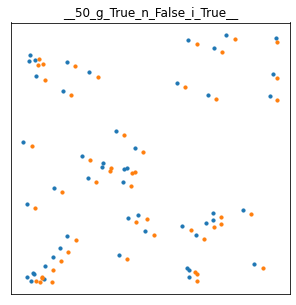

vx_bias = 16, vx_simulated = 15.468861973121541
vy_bias = -8, vy_simulated = -7.8936713628199175


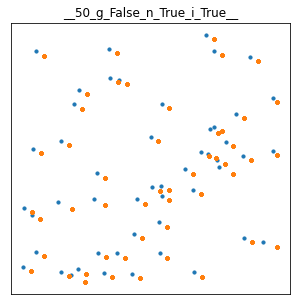

vx_bias = 16, vx_simulated = 16.237270047811045
vy_bias = -8, vy_simulated = -8.863135074269717


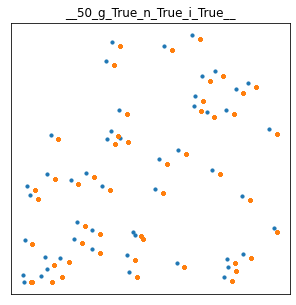

vx_bias = 16, vx_simulated = 15.86075495152165
vy_bias = -8, vy_simulated = -8.756219008295304


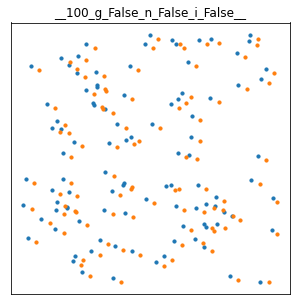

vx_bias = 16, vx_simulated = 15.857156009209094
vy_bias = -8, vy_simulated = -7.921957673039536


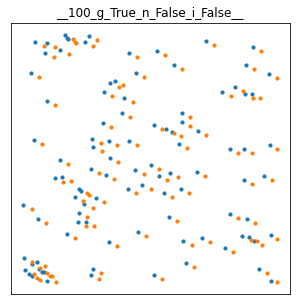

vx_bias = 16, vx_simulated = 15.883447457979115
vy_bias = -8, vy_simulated = -7.882271736570949


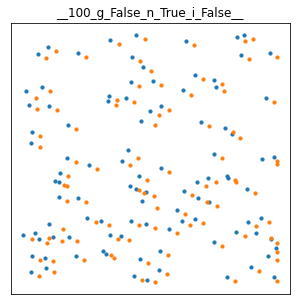

vx_bias = 16, vx_simulated = 16.40254375108146
vy_bias = -8, vy_simulated = -8.255630941437378


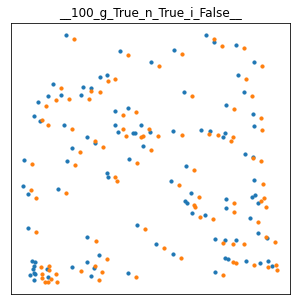

vx_bias = 16, vx_simulated = 16.67864726982941
vy_bias = -8, vy_simulated = -8.174281405326175


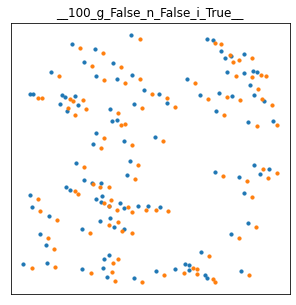

vx_bias = 16, vx_simulated = 15.869536780399503
vy_bias = -8, vy_simulated = -8.046106813241972


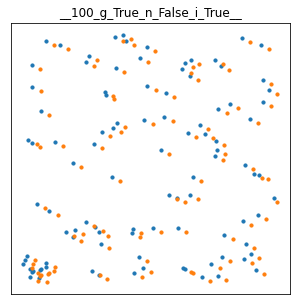

vx_bias = 16, vx_simulated = 15.835321692831226
vy_bias = -8, vy_simulated = -8.052715846620652


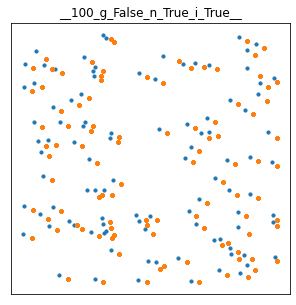

vx_bias = 16, vx_simulated = 15.726149757826885
vy_bias = -8, vy_simulated = -8.81245003541022


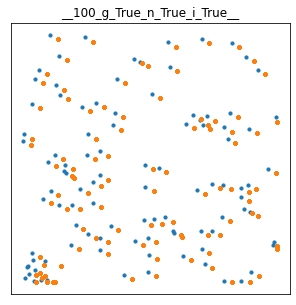

vx_bias = 16, vx_simulated = 15.859506929755634
vy_bias = -8, vy_simulated = -8.356241353039586


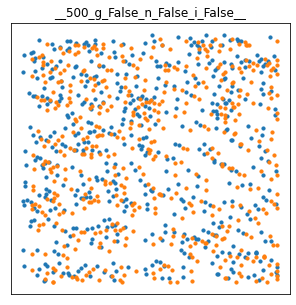

vx_bias = 16, vx_simulated = 15.727409350909014
vy_bias = -8, vy_simulated = -7.962499854968435


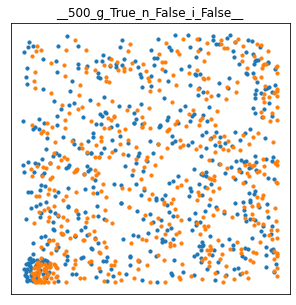

vx_bias = 16, vx_simulated = 15.772945329720196
vy_bias = -8, vy_simulated = -7.86023740354369


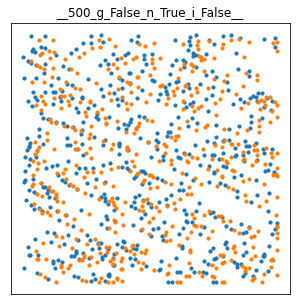

vx_bias = 16, vx_simulated = 16.51694981786959
vy_bias = -8, vy_simulated = -8.212710053850005


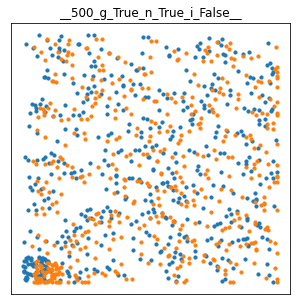

vx_bias = 16, vx_simulated = 16.670544276689505
vy_bias = -8, vy_simulated = -8.212740637201387


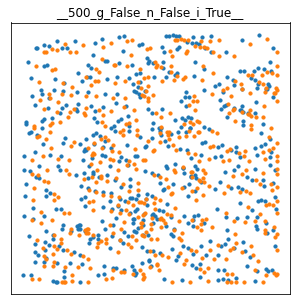

vx_bias = 16, vx_simulated = 15.739644755198547
vy_bias = -8, vy_simulated = -7.945044554563256


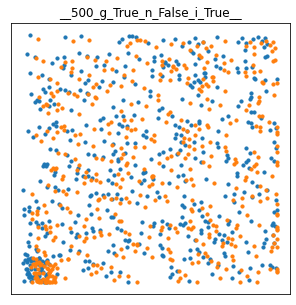

vx_bias = 16, vx_simulated = 15.57989643680082
vy_bias = -8, vy_simulated = -7.9134084530243145


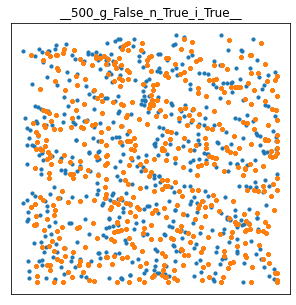

vx_bias = 16, vx_simulated = 16.13153011359457
vy_bias = -8, vy_simulated = -8.820327606432596


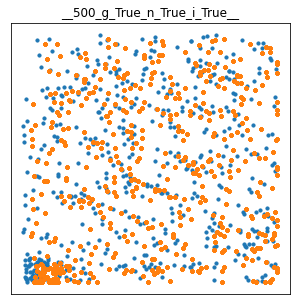

vx_bias = 16, vx_simulated = 16.06885479746405
vy_bias = -8, vy_simulated = -8.621771547521915


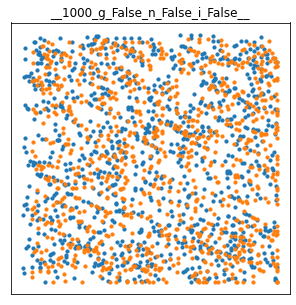

vx_bias = 16, vx_simulated = 15.713620149007706
vy_bias = -8, vy_simulated = -7.9249219168492715


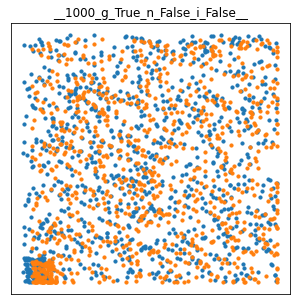

vx_bias = 16, vx_simulated = 15.758341406378182
vy_bias = -8, vy_simulated = -7.851765771858675


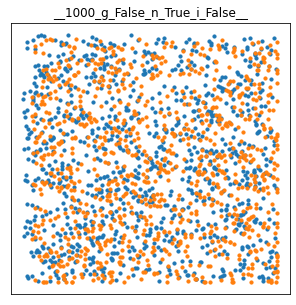

vx_bias = 16, vx_simulated = 16.594460033160008
vy_bias = -8, vy_simulated = -8.335766089790212


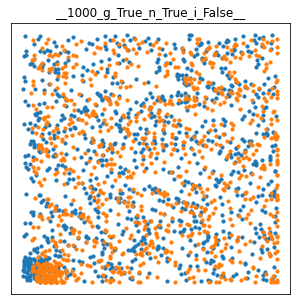

vx_bias = 16, vx_simulated = 16.544442630405687
vy_bias = -8, vy_simulated = -8.229536538551002


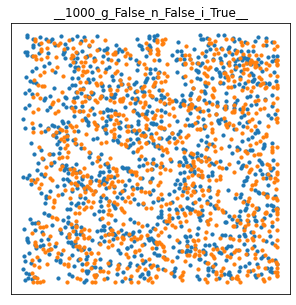

vx_bias = 16, vx_simulated = 15.717146131486853
vy_bias = -8, vy_simulated = -8.020042742497587


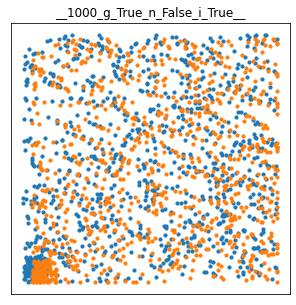

vx_bias = 16, vx_simulated = 15.706860935385787
vy_bias = -8, vy_simulated = -7.979839455174428


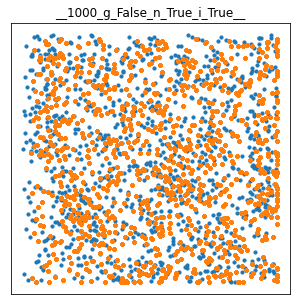

vx_bias = 16, vx_simulated = 15.996586838688392
vy_bias = -8, vy_simulated = -8.766934788475695


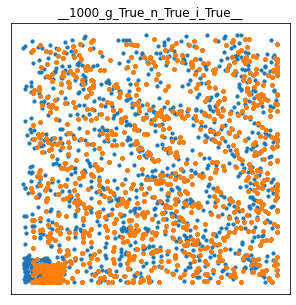

vx_bias = 16, vx_simulated = 16.182275472354306
vy_bias = -8, vy_simulated = -8.54294564589132


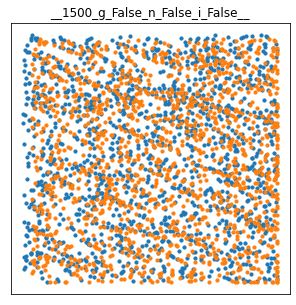

vx_bias = 16, vx_simulated = 15.712026696084449
vy_bias = -8, vy_simulated = -7.950804737228288


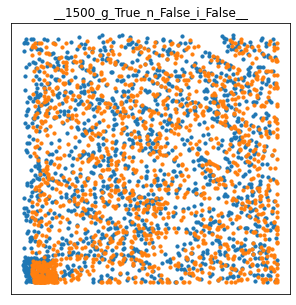

vx_bias = 16, vx_simulated = 15.85964321121468
vy_bias = -8, vy_simulated = -7.871610389725148


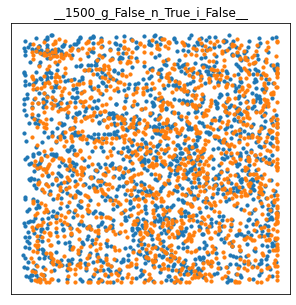

vx_bias = 16, vx_simulated = 16.58074633109725
vy_bias = -8, vy_simulated = -8.334833938948671


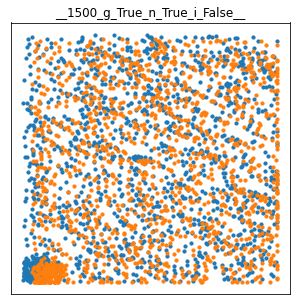

vx_bias = 16, vx_simulated = 16.522266661939867
vy_bias = -8, vy_simulated = -8.229830352328442


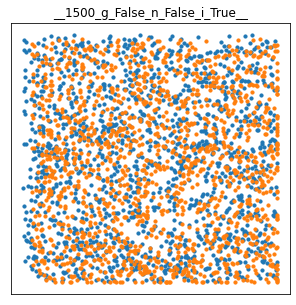

vx_bias = 16, vx_simulated = 15.707094887091994
vy_bias = -8, vy_simulated = -7.987591655951421


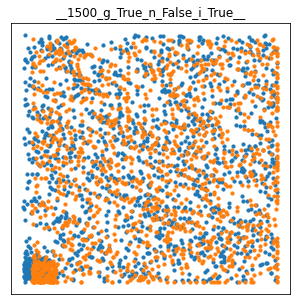

vx_bias = 16, vx_simulated = 15.662968378267086
vy_bias = -8, vy_simulated = -7.970441054151983


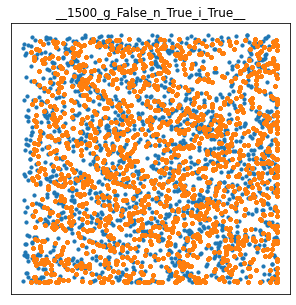

vx_bias = 16, vx_simulated = 15.99767833042985
vy_bias = -8, vy_simulated = -8.824963438837733


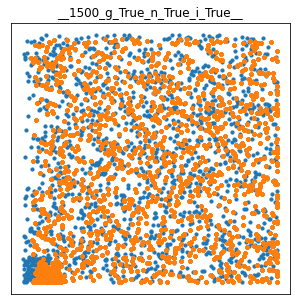

vx_bias = 16, vx_simulated = 16.026101691820354
vy_bias = -8, vy_simulated = -8.665771224960881


In [2]:
n_samples = 1500
vx_bias   = 16     # mm/sec
vy_bias   = -8     # mm/sec
delta_t   = 1     # sec
box_size_mm = 500 # mm

######################################################################################################################################################### 
for n_samples in [10,50,100,500,1000,1500]:
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, False, False, False,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, True , False, False,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, False, True , False,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, True , True , False,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, False, False, True ,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, True , False, True ,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, False, True , True ,True)
    simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, True , True , True ,True)


(array([ 7.,  5., 10., 19., 22.,  9., 13.,  4.,  6.,  5.]),
 array([-0.7937651 , -0.76751688, -0.74126866, -0.71502044, -0.68877222,
        -0.662524  , -0.63627578, -0.61002756, -0.58377933, -0.55753111,
        -0.53128289]),
 <BarContainer object of 10 artists>)

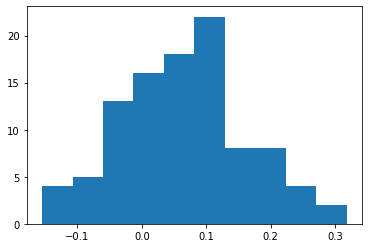

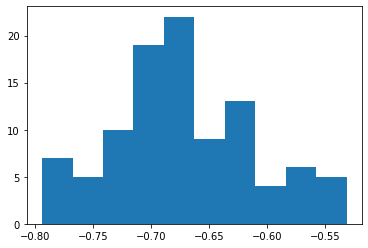

In [3]:
n_samples = 500
vx_bias   = 16     # mm/sec
vy_bias   = -8     # mm/sec
delta_t   = 1     # sec
box_size_mm = 500 # mm

######################################################################################################################################################### 
xvel_error,yvel_error=[],[]
for i in range(100):
    a,b = simulate_with(n_samples, vx_bias, vy_bias, delta_t, box_size_mm, True , True , True ,False)
    xvel_error.append(a-vx_bias)
    yvel_error.append(b-vy_bias)
plt.figure()
plt.hist(xvel_error)
plt.figure()
plt.hist(yvel_error)


In [4]:
(np.mean(xvel_error),np.std(xvel_error)),(np.mean(yvel_error),np.std(yvel_error))

((0.06705319576031975, 0.09406027864805544),
 (-0.6716237222112723, 0.05974614964993332))